In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
     

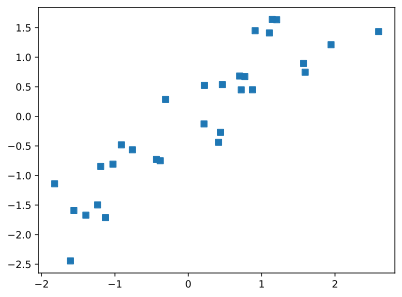

In [54]:
N=30
x=torch.randn(N,1)
y=x + torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [55]:
ANNreg=nn.Sequential(nn.Linear(1,1),nn.ReLU(),nn.Linear(1,1))
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [56]:
learningRate=0.05
lossfun=nn.MSELoss()
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [57]:
numepoches=500
losses=torch.zeros(numepoches)
for epochi in range(numepoches):
    yHat=ANNreg(x)
    loss=lossfun(yHat,y)
    losses[epochi]=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0.5, 1.0, 'Final loss = 0.18134751915931702 ')

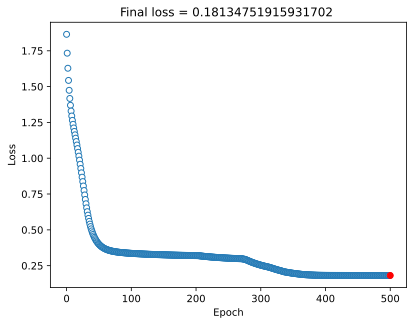

In [58]:
preds=ANNreg(x)
testloss=(preds-y).pow(2).mean()
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=0.1)
plt.plot(numepoches,testloss.detach(),'ro')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Final loss = {testloss.item()} ")


In [59]:
testloss

tensor(0.1813, grad_fn=<MeanBackward0>)

In [60]:
testloss.detach()

tensor(0.1813)

In [61]:
 testloss.item()

0.18134751915931702

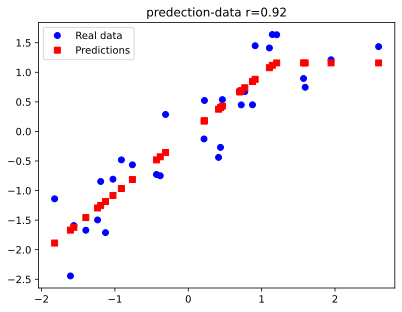

In [62]:
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,preds.detach(),'rs',label='Predictions')
plt.title(f"predection-data r={np.corrcoef(y.detach().T,preds.detach().T)[0,1]:.2f}")
plt.legend()
plt.show()

In [24]:
preds

tensor([[ 2.5065],
        [ 2.4650],
        [-1.5157],
        [-0.0429],
        [ 0.7486],
        [ 1.0582],
        [ 0.6711],
        [ 1.0867],
        [-0.0426],
        [ 0.1252],
        [ 0.4258],
        [-0.4417],
        [-3.4236],
        [ 1.7919],
        [ 0.3074],
        [ 1.5085],
        [-0.6748],
        [ 0.8256],
        [ 0.6587],
        [-0.7283],
        [-0.2162],
        [-0.2089],
        [-0.7037],
        [ 0.8756],
        [ 0.9044],
        [ 0.6179],
        [ 0.6883],
        [-0.3501],
        [-0.0930],
        [ 1.9114]], grad_fn=<AddmmBackward0>)

In [87]:
def regpred(x,y,learningRate=0.05,numepoches=500):
    ANNreg=nn.Sequential(nn.Linear(1,1),nn.ReLU(),nn.Linear(1,1))
    lossfun=nn.MSELoss()
    optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    losses=torch.zeros(numepoches)
    for epochi in range(numepoches):
        yHat=ANNreg(x)
        loss=lossfun(yHat,y)
        losses[epochi]=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    preds=ANNreg(x)
    return(preds,losses)

In [88]:
def data_gen(m):
    N=50
    x=torch.randn(N,1)
    y=m*x + torch.randn(N,1)/2
   
    return(x,y)

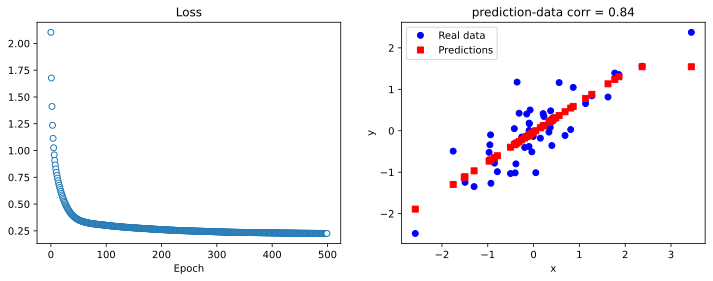

In [89]:
x,y=data_gen(0.8)
yHat,losses=regpred(x,y)
yHat=yHat.detach()
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()
     

In [99]:
slopes=np.linspace(-2,2,21)
numExp=50
results=np.zeros((len(slopes),numExp,2))
for slopi in range(len(slopes)):
    for N in range(numExp):
        x,y=data_gen(slopes[slopi])
        yHat,losses=regpred(x,y)
        yHat=yHat.detach()
        results[slopi,N,0]=losses[-1]
        results[slopi,N,1]=np.corrcoef(y.T,yHat.T)[0,1]
results[np.isnan(results)]=0

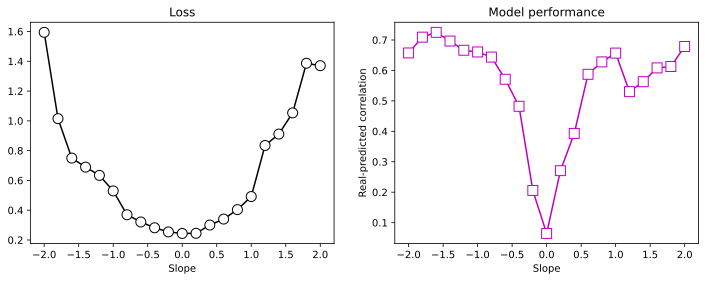

In [103]:

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()
     


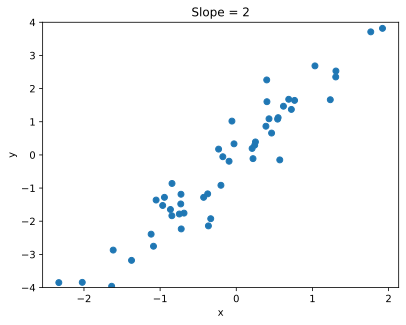

In [91]:
m = 2

x,y = data_gen(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
     

In [96]:
pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 155.4 kB/s eta 0:00:00m eta 0:00:010:00:04
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.
